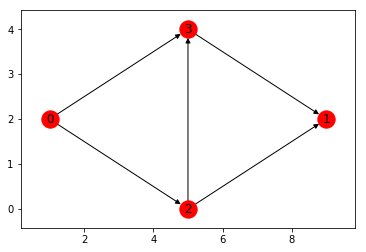

In [3]:
import re
import networkx as nx
import matplotlib.pyplot as plt

def file_parsing(file_path):
    cnt = 0
    output_list = []
    edge_list = []
    with open(file_path, 'r') as fp:
        for line in fp:
            cnt += 1
            #checks for the room name and coordinates
            if re.match('([^\s#]{1,10}) (\d+) (\d+)', line, re.MULTILINE):
                output_list.append(line.strip().split(' '))
            #checks for start
            if line.startswith('##start'):
                output_list.append(next(fp, '').strip().split())
            #checks for end
            if line.startswith('##end'):
                output_list.append(next(fp, '').strip().split())

            # --------- Check for edges -----------#
            if '-' in line:
                src, dest = line.split('-')
                edge_list.append([src.strip(), dest.strip()])
    room_name = [item[0] for item in output_list]
    x_coord = [int(item[1]) for item in output_list]
    y_coord = [int(item[2]) for item in output_list]
    x_y = list(zip(x_coord, y_coord))
    pos_dict = dict(zip(room_name, x_y))

    return pos_dict, edge_list

room_pos_dict, edge_list = file_parsing('ex2.txt')

G = nx.DiGraph()
G.add_nodes_from(room_pos_dict.keys())

#----------- Add edges from the edge list ------ 
G.add_edges_from(edge_list)

nx.set_node_attributes(G, room_pos_dict, 'pos')
nx.draw_networkx(G, pos=nx.get_node_attributes(G, 'pos'))